In [3]:
!pip install tensorflow

  Using cached tensorflow-2.17.0-cp311-cp311-win_amd64.whl.metadata (3.2 kB)
Using cached tensorflow-2.17.0-cp311-cp311-win_amd64.whl (2.0 kB)


In [4]:
!pip install matplotlib

Next step:
Importing Libraries: The code starts by importing TensorFlow and a specific dataset from Keras.
Loading Data: It loads movie review data from the IMDb dataset.
Limiting Vocabulary: The num_words=10000 part ensures that only the 10,000 most common words in the reviews are used.

In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb

# Load IMDB dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)


Next step:
Viewing Data: The code prints the first movie review and its corresponding label.
Review Content: train_data[0] shows the actual review (as a list of word indices).
Review Label: train_labels[0] shows the label (0 for negative, 1 for positive).

In [4]:
# View the first review
print(train_data[0])
print(train_labels[0])


[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


Next step:
Mapping Words to Numbers: The code creates a dictionary that maps words to unique numbers.
Reserving Indices: It reserves the first few numbers for special tokens like padding (<PAD>), start of a review (<START>), unknown words (<UNK>), and unused tokens (<UNUSED>).
Reversing the Mapping: It then creates a reverse dictionary to map numbers back to words.
Decoding Function: The decode_review function converts a list of numbers back into a readable review.
Printing the Review: Finally, it decodes and prints the first review in the dataset.

In [5]:
# A dictionary mapping words to an integer index
word_index = imdb.get_word_index()

# The first indices are reserved
word_index = {k: (v + 3) for k, v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

# Reverse the word index to map integers back to words
reverse_word_index = {value: key for key, value in word_index.items()}

# Decode function
def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

# Decode and print the first review
print(decode_review(train_data[0]))


<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wha

Next steps:
Counting Reviews: The code prints the number of reviews in the training and test datasets.
Training Data: len(train_data) gives the total number of training reviews.
Test Data: len(test_data) gives the total number of test reviews.

In [6]:
print(f"Training data: {len(train_data)} reviews")
print(f"Test data: {len(test_data)} reviews")


Training data: 25000 reviews
Test data: 25000 reviews


Next steps:
Length of First Review: The code prints the length (number of words) of the first review.
Review Lengths: It calculates the lengths of all reviews in the training data.
Plotting Distribution: It uses matplotlib to create a histogram showing the distribution of review lengths.
Histogram Details: The histogram has 50 bins, with the x-axis representing review lengths and the y-axis showing how often each length occurs.

218


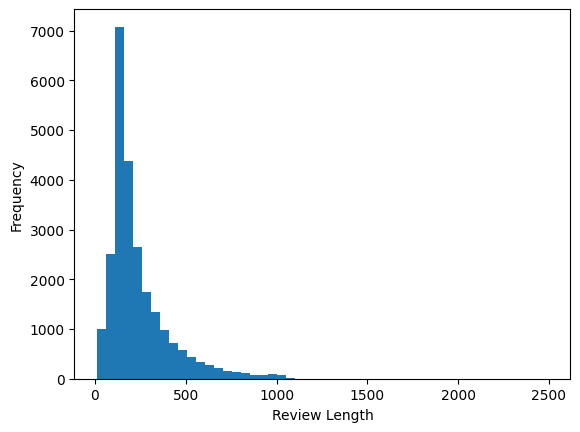

In [7]:
# Length of the first review
print(len(train_data[0]))

# Distribution of review lengths
review_lengths = [len(review) for review in train_data]
import matplotlib.pyplot as plt

plt.hist(review_lengths, bins=50)
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()


Next step:
Importing Library: The code imports the numpy library for numerical operations.
Counting Positive Reviews: It calculates the total number of positive reviews by summing up the labels (where 1 indicates a positive review).
Counting Negative Reviews: It calculates the total number of negative reviews by subtracting the number of positive reviews from the total number of reviews.
Printing Counts: Finally, it prints the counts of positive and negative reviews.

In [8]:
import numpy as np

# Count the number of positive and negative labels
positive_reviews = np.sum(train_labels)
negative_reviews = len(train_labels) - positive_reviews

print(f"Positive reviews: {positive_reviews}")
print(f"Negative reviews: {negative_reviews}")


Positive reviews: 12500
Negative reviews: 12500


Next step:
Installing package scikit-learn

In [9]:
!pip install scikit-learn

Next steps:
Importing Libraries: The code imports necessary libraries for text processing, data splitting, and machine learning.
Decoding Reviews: It converts the reviews from numerical format back into text.
Splitting Data: It splits the data into training and validation sets, with 20% of the data used for validation.
Vectorizing Text: It uses TF-IDF (Term Frequency-Inverse Document Frequency) to convert the text into numerical features, focusing on the top 10,000 words.

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Decode the reviews back into text
train_text = [decode_review(review) for review in train_data]
test_text = [decode_review(review) for review in test_data]

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_text, train_labels, test_size=0.2, random_state=42)

# Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer(max_features=10000)  # Limit to top 10,000 words
X_train_tfidf = vectorizer.fit_transform(X_train)
X_val_tfidf = vectorizer.transform(X_val)


Next steps:
Training the Model: The code trains a Logistic Regression model using the TF-IDF features from the training data.
Making Predictions: It predicts the labels for the validation data.
Evaluating the Model: It calculates the accuracy of the model by comparing the predicted labels with the actual labels.
Printing Accuracy: Finally, it prints the validation accuracy as a percentage.

In [11]:
# Train a Logistic Regression model
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train_tfidf, y_train)

# Predict on validation data using Logistic Regression model
y_pred_lr = model_lr.predict(X_val_tfidf)  # Ensure this returns binary predictions

# Evaluate the Logistic Regression model
accuracy = accuracy_score(y_val, y_pred_lr)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")



Validation Accuracy: 88.30%


Next steps:
Importing Library: The code imports a function for padding sequences from TensorFlow’s Keras module.
Setting Maximum Length: It sets a maximum length of 500 words for each review.
Padding Sequences: It pads the reviews so that all of them have the same length (500 words), adding padding at the end (padding='post').

This ensures that all reviews are of uniform length, which is necessary for many machine learning models.

In [12]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Set a maximum review length
max_length = 500

# Pad the sequences so that all reviews have the same length
X_train_padded = pad_sequences(train_data, maxlen=max_length, padding='post')
X_test_padded = pad_sequences(test_data, maxlen=max_length, padding='post')


Next step:

Importing Libraries: The code imports necessary components for building a neural network from TensorFlow’s Keras module.

Defining the Model: It creates a Sequential model and adds layers:
Embedding Layer: Converts word indices into dense vectors of fixed size (32 dimensions).
LSTM Layer: Adds a Long Short-Term Memory (LSTM) layer with 32 units to capture sequential dependencies.
Dense Layer: Adds a Dense layer with a sigmoid activation function for binary classification.

Compiling the Model: It compiles the model using the Adam optimizer and binary cross-entropy loss, and sets accuracy as a metric.

Training the Model: It trains the model on the padded training data for 5 epochs, with a batch size of 64, and uses 20% of the data for validation.

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Define the LSTM model
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=32, input_length=max_length))
model.add(LSTM(units=32))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_padded, train_labels, epochs=5, batch_size=64, validation_split=0.2)


Epoch 1/5


c:\Users\C830277\Desktop\Python\sentiment\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


313/313 ━━━━━━━━━━━━━━━━━━━━ 71s 222ms/step - accuracy: 0.4983 - loss: 0.6935 - val_accuracy: 0.5008 - val_loss: 0.6996
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 87s 237ms/step - accuracy: 0.5122 - loss: 0.6894 - val_accuracy: 0.5160 - val_loss: 0.6881
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 74s 237ms/step - accuracy: 0.5298 - loss: 0.6700 - val_accuracy: 0.5178 - val_loss: 0.7031
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 61s 194ms/step - accuracy: 0.5337 - loss: 0.6514 - val_accuracy: 0.5278 - val_loss: 0.6845
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 50s 159ms/step - accuracy: 0.5388 - loss: 0.6409 - val_accuracy: 0.5162 - val_loss: 0.7115


Next step:
Evaluating the Model: The code evaluates the trained model on the test data.
Calculating Metrics: It calculates the loss and accuracy on the test set.
Printing Accuracy: Finally, it prints the test accuracy as a percentage.

In [14]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(X_test_padded, test_labels)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


782/782 ━━━━━━━━━━━━━━━━━━━━ 44s 56ms/step - accuracy: 0.5048 - loss: 0.7095
Test Accuracy: 51.32%


Next step:
Importing Library: The code imports the classification_report function from sklearn.metrics.
Generating Report: It creates a classification report for the Bag-of-Words model, comparing the true labels (y_val) with the predicted labels (y_pred).
Target Names: It labels the classes as ‘Negative’ and ‘Positive’.
Printing Report: Finally, it prints the evaluation report, which includes precision, recall, and F1-score for each class.

In [15]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Load the dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# A dictionary mapping words to an integer index
word_index = imdb.get_word_index()

# The first indices are reserved
word_index = {k: (v + 3) for k, v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

# Reverse the word index to map integers back to words
reverse_word_index = {value: key for key, value in word_index.items()}

# Decode function
def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

# Decode the reviews back into text
train_text = [decode_review(review) for review in train_data]
test_text = [decode_review(review) for review in test_data]

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_text, train_labels, test_size=0.2, random_state=42)

# Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer(max_features=10000)  # Limit to top 10,000 words
X_train_tfidf = vectorizer.fit_transform(X_train)
X_val_tfidf = vectorizer.transform(X_val)

# Train a Logistic Regression model
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train_tfidf, y_train)

# Predict on validation data using Logistic Regression model
y_pred_lr = model_lr.predict(X_val_tfidf)  # Ensure this returns binary predictions

# Evaluate the Logistic Regression model
accuracy = accuracy_score(y_val, y_pred_lr)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

# Get the classification report for the Logistic Regression model
bow_class_report = classification_report(y_val, y_pred_lr, target_names=['Negative', 'Positive'])
print("Logistic Regression Model Evaluation:\n", bow_class_report)


Validation Accuracy: 88.30%
Logistic Regression Model Evaluation:
               precision    recall  f1-score   support

    Negative       0.89      0.87      0.88      2437
    Positive       0.88      0.90      0.89      2563

    accuracy                           0.88      5000
   macro avg       0.88      0.88      0.88      5000
weighted avg       0.88      0.88      0.88      5000



Next step: 
Importing Library: The code imports the classification_report function from sklearn.metrics.
Generating Report: It creates a classification report for the Bag-of-Words model, comparing the true labels (y_val) with the predicted labels (y_pred).
Target Names: It labels the classes as ‘Negative’ and ‘Positive’.
Printing Report: Finally, it prints the evaluation report, which includes precision, recall, and F1-score for each class.

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import classification_report
from tensorflow.keras.datasets import imdb

# Load the IMDb dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# Set a maximum review length
max_length = 500

# Pad the sequences so that all reviews have the same length
X_train_padded = pad_sequences(train_data, maxlen=max_length, padding='post')
X_test_padded = pad_sequences(test_data, maxlen=max_length, padding='post')

# Define the LSTM model
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=32, input_length=max_length))
model.add(LSTM(units=32))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_padded, train_labels, epochs=5, batch_size=64, validation_split=0.2)

# Predict on the test data
y_test_pred = (model.predict(X_test_padded) > 0.5).astype("int32")

# Get the classification report for the LSTM model
lstm_class_report = classification_report(test_labels, y_test_pred, target_names=['Negative', 'Positive'])
print("LSTM Model Evaluation:\n", lstm_class_report)



Epoch 1/5


c:\Users\C830277\Desktop\Python\sentiment\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


313/313 ━━━━━━━━━━━━━━━━━━━━ 83s 250ms/step - accuracy: 0.5009 - loss: 0.6933 - val_accuracy: 0.5054 - val_loss: 0.6925
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 52s 154ms/step - accuracy: 0.5180 - loss: 0.6848 - val_accuracy: 0.5090 - val_loss: 0.6878
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 45s 145ms/step - accuracy: 0.5245 - loss: 0.6640 - val_accuracy: 0.5136 - val_loss: 0.6939
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 46s 147ms/step - accuracy: 0.5406 - loss: 0.6447 - val_accuracy: 0.5230 - val_loss: 0.7059
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 46s 146ms/step - accuracy: 0.5443 - loss: 0.6363 - val_accuracy: 0.5210 - val_loss: 0.7520
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 40ms/step
LSTM Model Evaluation:
               precision    recall  f1-score   support

    Negative       0.51      0.95      0.67     12500
    Positive       0.65      0.09      0.16     12500

    accuracy                           0.52     25000
   macro avg       0.58      0.52      0.41     25000
weighted avg       0.

Next step:
Finding Misclassified Reviews: The code identifies the indices of reviews where the true labels don’t match the predicted labels.
Decoding Reviews: It decodes these misclassified reviews back into text.
Printing Examples: It prints a few examples of these misclassified reviews, along with their true and predicted labels.

In [17]:
# Extract misclassified reviews for the LSTM model
misclassified_indices = [i for i in range(len(test_labels)) if test_labels[i] != y_test_pred[i]]
misclassified_reviews = [decode_review(X_test_padded[i]) for i in misclassified_indices]

# Print a few examples
for i in range(5):
    print("Review:", misclassified_reviews[i])
    print("True label:", test_labels[misclassified_indices[i]])
    print("Predicted label:", y_test_pred[misclassified_indices[i]])
    print()


Review: <START> this film requires a lot of patience because it focuses on mood and character development the plot is very simple and many of the scenes take place on the same set in frances <UNK> the sandy dennis character apartment but the film builds to a disturbing climax br br the characters create an atmosphere <UNK> with sexual tension and psychological <UNK> it's very interesting that robert altman directed this considering the style and structure of his other films still the trademark altman audio style is evident here and there i think what really makes this film work is the brilliant performance by sandy dennis it's definitely one of her darker characters but she plays it so perfectly and convincingly that it's scary michael burns does a good job as the mute young man regular altman player michael murphy has a small part the <UNK> moody set fits the content of the story very well in short this movie is a powerful study of loneliness sexual <UNK> and desperation be patient <U

Next step:
Defining a New Model: The code defines a new LSTM model with increased complexity:
Embedding Layer: Converts word indices into dense vectors with 64 dimensions (higher than before).
LSTM Layer: Adds an LSTM layer with 64 units (more than before).
Dense Layer: Adds a Dense layer with a sigmoid activation function for binary classification.
Compiling the Model: It compiles the model using the Adam optimizer and binary cross-entropy loss, and sets accuracy as a metric.
Training the Model: It trains the model on the padded training data for 5 epochs, with a batch size of 64, and uses 20% of the data for validation.

In [18]:
# Define a new LSTM model with more units and a higher embedding dimension
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=64, input_length=max_length))  # Increased embedding dimension
model.add(LSTM(units=64))  # Increased LSTM units
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_padded, train_labels, epochs=5, batch_size=64, validation_split=0.2)


Epoch 1/5


c:\Users\C830277\Desktop\Python\sentiment\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


313/313 ━━━━━━━━━━━━━━━━━━━━ 81s 251ms/step - accuracy: 0.4927 - loss: 0.6934 - val_accuracy: 0.4970 - val_loss: 0.6923
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 80s 256ms/step - accuracy: 0.5127 - loss: 0.6973 - val_accuracy: 0.5042 - val_loss: 0.6885
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 81s 259ms/step - accuracy: 0.5308 - loss: 0.6665 - val_accuracy: 0.5156 - val_loss: 0.6940
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 115s 369ms/step - accuracy: 0.5365 - loss: 0.6457 - val_accuracy: 0.5112 - val_loss: 0.7038
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 120s 382ms/step - accuracy: 0.5464 - loss: 0.6371 - val_accuracy: 0.5056 - val_loss: 0.7116


Next step:
Changing Learning Rate: The code compiles the model with the Adam optimizer, but with a lower learning rate of 0.0005.
Compiling the Model: It uses binary cross-entropy as the loss function and tracks accuracy as a metric.
Retraining the Model: It retrains the model on the padded training data for 5 epochs, with a batch size of 64, and uses 20% of the data for validation.

In [19]:
from tensorflow.keras.optimizers import Adam

# Define the model with a different learning rate
model.compile(optimizer=Adam(learning_rate=0.0005),  # Decreased learning rate
              loss='binary_crossentropy', metrics=['accuracy'])

# Retrain the model
history = model.fit(X_train_padded, train_labels, epochs=5, batch_size=64, validation_split=0.2)


Epoch 1/5


313/313 ━━━━━━━━━━━━━━━━━━━━ 126s 390ms/step - accuracy: 0.5474 - loss: 0.6329 - val_accuracy: 0.5184 - val_loss: 0.7455
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 122s 389ms/step - accuracy: 0.5539 - loss: 0.6317 - val_accuracy: 0.5030 - val_loss: 0.7138
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 125s 400ms/step - accuracy: 0.5448 - loss: 0.6324 - val_accuracy: 0.5178 - val_loss: 0.7219
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 135s 376ms/step - accuracy: 0.5403 - loss: 0.6313 - val_accuracy: 0.5116 - val_loss: 0.7565
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 123s 392ms/step - accuracy: 0.5397 - loss: 0.6306 - val_accuracy: 0.5164 - val_loss: 0.7403


Next step: Importing Libraries: The code imports TensorFlow and the IMDB dataset module from Keras.
Loading Dataset: It loads the IMDB dataset, including only the 10,000 most frequently occurring words.
Splitting Data: The dataset is split into training and testing sets, with train_data and test_data containing the reviews, and train_labels and test_labels containing the sentiment labels (positive or negative).

In [20]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb

# Load the dataset with the top 10,000 most frequent words
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)


Next Step: Mapping Words to Indices: The code creates a dictionary that maps words to integer indices using the IMDB dataset’s word index.
Reserving Indices: It reserves the first few indices for special tokens like padding (<PAD>), start of sequence (<START>), unknown words (<UNK>), and unused tokens (<UNUSED>).
Reversing the Word Index: The code reverses the word index to map integers back to words.
Decoding Function: It defines a function to decode a sequence of integers back into a readable review text.
Decoding Reviews: The code decodes the training and testing reviews back into text format using the defined function.

In [21]:
# A dictionary mapping words to an integer index
word_index = imdb.get_word_index()

# The first indices are reserved
word_index = {k: (v + 3) for k, v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

# Reverse the word index to map integers back to words
reverse_word_index = {value: key for key, value in word_index.items()}

# Decode function
def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

# Decode the reviews back into text
train_text = [decode_review(review) for review in train_data]
test_text = [decode_review(review) for review in test_data]


Next step: 
Tokenizing Text: The code initializes a tokenizer to process the text data, limiting it to the top 10,000 words.
Fitting Tokenizer: It fits the tokenizer on the decoded training text data to create a word index.
Creating Sequences: The reviews are converted into sequences of integers based on the word index.
Padding Sequences: The sequences are padded to ensure they all have the same length (500 words).
Output Shapes: It prints the shapes of the padded training and testing data to confirm their dimensions.

In [22]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_words = 10000  # Use top 10,000 words from the dataset
max_length = 500   # Maximum review length

# Initialize the tokenizer and fit it on the training text data
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train_text)  # Fit on the decoded training data

# Create the word_index
word_index = tokenizer.word_index

# Convert the reviews to sequences and pad them
X_train_padded = pad_sequences(tokenizer.texts_to_sequences(train_text), maxlen=max_length)
X_test_padded = pad_sequences(tokenizer.texts_to_sequences(test_text), maxlen=max_length)

print(f"Shape of X_train_padded: {X_train_padded.shape}")
print(f"Shape of X_test_padded: {X_test_padded.shape}")


Shape of X_train_padded: (25000, 500)
Shape of X_test_padded: (25000, 500)


Next step:
Loading GloVe Embeddings: The code loads pre-trained GloVe word embeddings from a file into a dictionary.
Creating Embedding Matrix: It initializes an embedding matrix with zeros, sized for the top 10,000 words and 100-dimensional embeddings.
Populating Embedding Matrix: For each word in the word index, if the word is among the top 10,000, it retrieves the corresponding GloVe embedding and assigns it to the embedding matrix.

In [23]:
import numpy as np

# Load the GloVe embeddings
embedding_index = {}
with open('C:\\Users\\C830277\\Desktop\\Python\\glove.6B.100d.txt', 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coefs

# Create an embedding matrix
embedding_dim = 100  # Use 100-dimensional embeddings
embedding_matrix = np.zeros((10000, embedding_dim))

for word, i in word_index.items():
    if i < 10000:
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector



Next step:
Defining the Model: The code defines a Sequential model with an embedding layer, an LSTM layer, and a dense output layer.
Embedding Layer: It uses pre-trained GloVe embeddings, which are frozen (not trainable), for the top 10,000 words.
LSTM Layer: Adds an LSTM layer with 64 units to process the sequences.
Output Layer: Adds a dense layer with a sigmoid activation function for binary classification.
Compiling the Model: The model is compiled with the Adam optimizer, binary cross-entropy loss, and accuracy as a metric.
Training the Model: The model is trained on the padded training data for 5 epochs, with a batch size of 64, and 20% of the data used for validation.
Evaluating the Model: The model’s performance is evaluated on the test data, and the test accuracy is printed.

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Define the LSTM model with pre-trained GloVe embeddings
model = Sequential()
model.add(Embedding(input_dim=10000, 
                    output_dim=embedding_dim, 
                    weights=[embedding_matrix], 
                    input_length=max_length, 
                    trainable=False))  # Set trainable=False to freeze the embeddings
model.add(LSTM(units=64))  # You can increase the number of LSTM units if needed
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_padded, train_labels, epochs=5, batch_size=64, validation_split=0.2)

# Evaluate on the test data
test_loss, test_acc = model.evaluate(X_test_padded, test_labels)
print(f"Test Accuracy with GloVe Embeddings: {test_acc * 100:.2f}%")


Epoch 1/5


313/313 ━━━━━━━━━━━━━━━━━━━━ 110s 341ms/step - accuracy: 0.6325 - loss: 0.6248 - val_accuracy: 0.7806 - val_loss: 0.5131
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 109s 350ms/step - accuracy: 0.7756 - loss: 0.4767 - val_accuracy: 0.8064 - val_loss: 0.4325
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 109s 349ms/step - accuracy: 0.8175 - loss: 0.4089 - val_accuracy: 0.8302 - val_loss: 0.4103
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 100s 319ms/step - accuracy: 0.8430 - loss: 0.3643 - val_accuracy: 0.8586 - val_loss: 0.3396
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 101s 322ms/step - accuracy: 0.8634 - loss: 0.3231 - val_accuracy: 0.8676 - val_loss: 0.3200
782/782 ━━━━━━━━━━━━━━━━━━━━ 64s 82ms/step - accuracy: 0.8596 - loss: 0.3225
Test Accuracy with GloVe Embeddings: 86.26%


Next step:
Extracting Misclassified Reviews (Logistic Regression): The code predicts labels for validation data using a Logistic Regression model and identifies misclassified reviews.

Extracting Misclassified Reviews (LSTM with GloVe): It predicts labels for test data using the LSTM model with GloVe embeddings, rounding the predictions, and identifies misclassified reviews.

Displaying Misclassified Reviews: The code prints examples of misclassified reviews for both models, showing the review text, true label, and predicted label.

In [25]:
from sklearn.metrics import confusion_matrix

# Extract misclassified reviews for Logistic Regression
y_val_pred_lr = model.predict(X_val_tfidf)
misclassified_indices_lr = [i for i in range(len(y_val)) if y_val[i] != y_val_pred_lr[i]]
misclassified_reviews_lr = [X_val[i] for i in misclassified_indices_lr]

# Extract misclassified reviews for the LSTM model with GloVe embeddings
y_test_pred_glove = model.predict(X_test_padded).round()
misclassified_indices_glove = [i for i in range(len(test_labels)) if test_labels[i] != y_test_pred_glove[i]]
misclassified_reviews_glove = [decode_review(test_data[i]) for i in misclassified_indices_glove]

# Display some examples of misclassified reviews for both models
print("Logistic Regression Misclassified Reviews:\n")
for i in range(5):
    print("Review:", misclassified_reviews_lr[i])
    print("True label:", y_val[misclassified_indices_lr[i]])
    print("Predicted label:", y_val_pred_lr[misclassified_indices_lr[i]])
    print()

print("\nLSTM with GloVe Misclassified Reviews:\n")
for i in range(5):
    print("Review:", misclassified_reviews_glove[i])
    print("True label:", test_labels[misclassified_indices_glove[i]])
    print("Predicted label:", y_test_pred_glove[misclassified_indices_glove[i]])
    print()


157/157 ━━━━━━━━━━━━━━━━━━━━ 228s 1s/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 63s 80ms/step
Logistic Regression Misclassified Reviews:

Review: <START> there's a major difference between releasing an original intense edge of your seat scary gore fest and doing like filmmaker eli roth and his team have done with cabin fever and simply acted like it the film follows five college <UNK> into a cabin in the woods that begins to prove fatal as one after the other <UNK> to this mysterious fast acting flesh eating disease it's not long before the friends turn on one another and can barely stand the sight of one another much less want to be in the same <UNK> as them as gross as it all sounds there's a certain spark behind the basic premise of this film that could have worked in the hands of a less cocky filmmaker unfortunately what we end up with is poorly drawn characters whose sole purpose seems to be to look beautiful at the beginning to make the inevitable <UNK> more <UNK> a hackneyed script so pr

Next step:
Installing NLTK: The code installs the Natural Language Toolkit (NLTK) library, which is used for natural language processing tasks.

In [26]:
!pip install nltk

  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
Using cached nltk-3.9.1-py3-none-any.whl (1.5 MB)


Next step:
Importing NLTK: The code imports the Natural Language Toolkit (NLTK) library.
Downloading Resources: It downloads the stopwords and WordNet data, which are essential for various natural language processing tasks.

In [27]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\C830277/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\C830277/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Next step:
Importing Libraries: The code imports regular expressions (re), stopwords from NLTK, and the WordNet lemmatizer.
Initializing Tools: It initializes the WordNet lemmatizer and sets up the list of English stopwords.
Defining Clean Text Function: The function clean_text removes special characters and numbers, converts text to lowercase, removes stopwords, and lemmatizes the words.
Cleaning Data: The code applies the clean_text function to the training and test data to preprocess the text.

In [28]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Remove special characters and numbers
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove stop words
    text = ' '.join([word for word in text.split() if word not in stop_words])
    # Lemmatize
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    return text

# Clean the training and test data
train_text_clean = [clean_text(review) for review in train_text]
test_text_clean = [clean_text(review) for review in test_text]


Next step:
Importing Stop Words: The code imports a list of English stop words from scikit-learn.
Defining Remove Stop Words Function: The function remove_stop_words removes stop words from a given text.
Applying Function: The code applies the remove_stop_words function to the cleaned training and test data to further preprocess the text by removing stop words.

In [29]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

def remove_stop_words(text):
    return ' '.join([word for word in text.split() if word not in ENGLISH_STOP_WORDS])

# Remove stop words from cleaned text
train_text_no_stop = [remove_stop_words(review) for review in train_text_clean]
test_text_no_stop = [remove_stop_words(review) for review in test_text_clean]


Next step:
Defining the Refined Model: The code defines a Sequential model with an embedding layer, two LSTM layers, and dropout layers for regularization.

Embedding Layer: Uses pre-trained GloVe embeddings, which are frozen (not trainable), for the top 10,000 words.

LSTM Layers: Adds two LSTM layers, the first with 64 units and the second with 32 units, with dropout layers (0.3) in between for regularization.

Output Layer: Adds a dense layer with a sigmoid activation function for binary classification.

Compiling the Model: The model is compiled with the Adam optimizer (learning rate 0.0005), binary cross-entropy loss, and accuracy as a metric.

Early Stopping: Implements early stopping to prevent overfitting, monitoring validation loss with a patience of 3 epochs.

Training the Model: The model is trained on the padded training data for up to 10 epochs, with a batch size of 64, and 20% of the data used for validation.

Evaluating the Model: The model’s performance is evaluated on the test data, and the test accuracy is printed.

In [30]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Define a refined LSTM model with additional layers and dropout
model_refined = Sequential()
model_refined.add(Embedding(input_dim=10000, 
                            output_dim=embedding_dim, 
                            weights=[embedding_matrix], 
                            input_length=max_length, 
                            trainable=False))
model_refined.add(LSTM(units=64, return_sequences=True))  # First LSTM layer
model_refined.add(Dropout(0.3))  # Add dropout for regularization
model_refined.add(LSTM(units=32))  # Second LSTM layer
model_refined.add(Dropout(0.3))  # Add dropout for regularization
model_refined.add(Dense(1, activation='sigmoid'))

# Compile the refined model
model_refined.compile(optimizer=Adam(learning_rate=0.0005), 
                      loss='binary_crossentropy', 
                      metrics=['accuracy'])

# Implement early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the refined model
history_refined = model_refined.fit(X_train_padded, 
                                    train_labels, 
                                    epochs=10, 
                                    batch_size=64, 
                                    validation_split=0.2, 
                                    callbacks=[early_stopping])

# Evaluate the refined model on test data
test_loss_refined, test_acc_refined = model_refined.evaluate(X_test_padded, test_labels)
print(f"Refined LSTM Test Accuracy: {test_acc_refined * 100:.2f}%")


Epoch 1/10


313/313 ━━━━━━━━━━━━━━━━━━━━ 139s 426ms/step - accuracy: 0.6020 - loss: 0.6489 - val_accuracy: 0.7516 - val_loss: 0.5373
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 110s 352ms/step - accuracy: 0.7576 - loss: 0.5165 - val_accuracy: 0.7634 - val_loss: 0.5084
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 119s 382ms/step - accuracy: 0.7905 - loss: 0.4589 - val_accuracy: 0.8204 - val_loss: 0.4104
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 135s 432ms/step - accuracy: 0.8164 - loss: 0.4129 - val_accuracy: 0.8296 - val_loss: 0.3955
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 129s 411ms/step - accuracy: 0.8301 - loss: 0.3888 - val_accuracy: 0.8440 - val_loss: 0.3663
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 114s 363ms/step - accuracy: 0.8290 - loss: 0.3890 - val_accuracy: 0.8480 - val_loss: 0.3636
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 129s 411ms/step - accuracy: 0.8531 - loss: 0.3510 - val_accuracy: 0.8574 - val_loss: 0.3408
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 134s 429ms/step - accuracy: 0.8538 - loss: 0.34

Hyperparameter Tuning

Next step:
Modifying Learning Rate and Batch Size: The code recompiles the refined model with a lower learning rate (0.0001) and increases the batch size to 128.

Compiling the Model: Uses the Adam optimizer, binary cross-entropy loss, and accuracy as a metric.

Training the Model: The model is trained on the padded training data for up to 10 epochs, with a batch size of 128, and 20% of the data used for validation, using early stopping to prevent overfitting.

Evaluating the Model: The model’s performance is evaluated on the test data, and the test accuracy is printed.

In [31]:
# Modify the learning rate and batch size
model_refined.compile(optimizer=Adam(learning_rate=0.0001), 
                      loss='binary_crossentropy', 
                      metrics=['accuracy'])

# Train the refined model with a different batch size
history_refined = model_refined.fit(X_train_padded, 
                                    train_labels, 
                                    epochs=10, 
                                    batch_size=128,  # Increase batch size
                                    validation_split=0.2, 
                                    callbacks=[early_stopping])

# Evaluate the refined model on test data
test_loss_refined, test_acc_refined = model_refined.evaluate(X_test_padded, test_labels)
print(f"Refined LSTM Test Accuracy with Batch Size 128: {test_acc_refined * 100:.2f}%")


Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 132s 813ms/step - accuracy: 0.8817 - loss: 0.2871 - val_accuracy: 0.8698 - val_loss: 0.3093
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 117s 743ms/step - accuracy: 0.8838 - loss: 0.2802 - val_accuracy: 0.8702 - val_loss: 0.3080
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 125s 799ms/step - accuracy: 0.8842 - loss: 0.2798 - val_accuracy: 0.8702 - val_loss: 0.3079
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 116s 741ms/step - accuracy: 0.8835 - loss: 0.2766 - val_accuracy: 0.8714 - val_loss: 0.3059
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 111s 709ms/step - accuracy: 0.8868 - loss: 0.2741 - val_accuracy: 0.8720 - val_loss: 0.3048
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 112s 712ms/step - accuracy: 0.8872 - loss: 0.2740 - val_accuracy: 0.8690 - val_loss: 0.3129
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 100s 634ms/step - accuracy: 0.8856 - loss: 0.2806 - val_accuracy: 0.8740 - val_loss: 0.3084
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 106s 676ms/step - accuracy: 0.8877 -

Updated Code for Hyperparameter Exploration: Trying to avoid "overfitting"

Next step:
Loading IMDB Dataset: The code loads the IMDB dataset, limiting it to the top 20,000 words.
Padding Sequences: It pads the sequences to a maximum length of 100 words to ensure uniform input size.
Splitting Data: The training data is further split into training and validation sets using an 80-20 split.

In [32]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# Load the IMDB dataset
vocab_size = 20000  # Adjust this according to your needs
max_len = 100  # Maximum length of sequences (padding/truncating)

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)

# Pad the sequences to the same length
X_train_padded = pad_sequences(X_train, maxlen=max_len)
X_test_padded = pad_sequences(X_test, maxlen=max_len)

# Split the training data further into training and validation sets
X_train_padded, X_val_padded, y_train, y_val = train_test_split(X_train_padded, y_train, test_size=0.2, random_state=42)


Model accuracy dropped from 86% to 80%

Next step:
Loading and Preprocessing Data: The code loads the IMDB dataset, limits it to the top 20,000 words, and pads sequences to a maximum length of 100 words. It then splits the training data into training and validation sets.

Building the LSTM Model: Defines a Sequential model with an embedding layer, two LSTM layers (each with 128 units), and dropout layers for regularization. The model is compiled with the Adam optimizer (learning rate 0.0005), binary cross-entropy loss, and accuracy as a metric.

Training the Model: The model is trained on the padded training data for 15 epochs, with a batch size of 256, and 20% of the data used for validation.

Evaluating the Model: The model’s performance is evaluated on the test data, and the test accuracy is printed.

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split

# Step 1: Load and preprocess the data
vocab_size = 20000
embedding_dim = 100
max_len = 100

# Load the IMDB dataset
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)

# Pad sequences to ensure consistent length
X_train_padded = pad_sequences(X_train, maxlen=max_len)
X_test_padded = pad_sequences(X_test, maxlen=max_len)

# Split the training data into training and validation sets
X_train_padded, X_val_padded, y_train, y_val = train_test_split(X_train_padded, y_train, test_size=0.2, random_state=42)

# Step 2: Build the LSTM model
def build_lstm_model(input_dim, output_dim, max_len):
    model = Sequential()

    # Embedding layer with trainable weights
    model.add(Embedding(input_dim=input_dim, output_dim=output_dim, input_length=max_len))
    
    # LSTM Layer with 128 units
    model.add(LSTM(128, return_sequences=True))
    model.add(Dropout(0.3))
    
    # Second LSTM Layer with 128 units
    model.add(LSTM(128))
    model.add(Dropout(0.3))
    
    # Output layer for binary classification
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile the model with Adam optimizer and custom learning rate
    model.compile(optimizer=Adam(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

# Step 3: Build and train the model
model = build_lstm_model(input_dim=vocab_size, output_dim=embedding_dim, max_len=max_len)

# Step 4: Train the model
history = model.fit(X_train_padded, y_train, epochs=15, batch_size=256, validation_data=(X_val_padded, y_val))

# Step 5: Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_padded, y_test)
print(f"Refined LSTM Test Accuracy with Further Hyperparameter Tuning: {test_accuracy * 100:.2f}%")


Epoch 1/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.6153 - loss: 0.6220 - val_accuracy: 0.8174 - val_loss: 0.3854
Epoch 2/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.8848 - loss: 0.2833 - val_accuracy: 0.8266 - val_loss: 0.3827
Epoch 3/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 89s 1s/step - accuracy: 0.9254 - loss: 0.1973 - val_accuracy: 0.8412 - val_loss: 0.3793
Epoch 4/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 87s 1s/step - accuracy: 0.9529 - loss: 0.1312 - val_accuracy: 0.8354 - val_loss: 0.4752
Epoch 5/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step - accuracy: 0.9753 - loss: 0.0806 - val_accuracy: 0.8244 - val_loss: 0.6021
Epoch 6/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 91s 1s/step - accuracy: 0.9793 - loss: 0.0644 - val_accuracy: 0.8254 - val_loss: 0.5566
Epoch 7/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 89s 1s/step - accuracy: 0.9737 - loss: 0.0780 - val_accuracy: 0.8246 - val_loss: 0.6835
Epoch 8/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 88s 1s/step - accuracy: 0.9877 - loss: 0.0388 - val_accuracy: 0.8184 - val_loss:

Next step:
Defining the LSTM Model: The code defines a Sequential model with an embedding layer, two LSTM layers (each with 64 units), and dropout layers (0.3) for regularization.

Embedding Layer: Uses an embedding layer with trainable weights for the top 20,000 words.

LSTM Layers: Adds two LSTM layers with reduced units (64) and dropout layers to prevent overfitting.

Output Layer: Adds a dense layer with a sigmoid activation function for binary classification.

Compiling the Model: The model is compiled with the Adam optimizer (learning rate 0.0001), binary cross-entropy loss, and accuracy as a metric.

Early Stopping: Implements early stopping to prevent overfitting, monitoring validation loss with a patience of 3 epochs.

Training the Model: The model is trained on the padded training data for up to 30 epochs, with a batch size of 128, and 20% of the data used for validation, using early stopping.

Evaluating the Model: The model’s performance is evaluated on the test data, and the test accuracy is printed.


In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Define the LSTM model with hyperparameter tuning
def build_lstm_model(input_dim, output_dim, max_len):
    model = Sequential()
    model.add(Embedding(input_dim=input_dim, output_dim=output_dim, input_length=max_len))
    model.add(LSTM(64, return_sequences=True))  # Reduced LSTM units
    model.add(Dropout(0.3))  # Adjusted dropout rate
    model.add(LSTM(64))  # Reduced LSTM units
    model.add(Dropout(0.3))  # Adjusted dropout rate
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Build the model
model = build_lstm_model(input_dim=vocab_size, output_dim=embedding_dim, max_len=max_len)

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_padded, y_train, epochs=30, batch_size=128, 
                    validation_data=(X_val_padded, y_val), callbacks=[early_stopping])

# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(X_test_padded, y_test)
print(f"Refined LSTM Test Accuracy with Further Hyperparameter Tuning: {test_accuracy * 100:.2f}%")


Epoch 1/30


157/157 ━━━━━━━━━━━━━━━━━━━━ 37s 220ms/step - accuracy: 0.5454 - loss: 0.6897 - val_accuracy: 0.7426 - val_loss: 0.5323
Epoch 2/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 49s 315ms/step - accuracy: 0.8049 - loss: 0.4373 - val_accuracy: 0.8230 - val_loss: 0.3817
Epoch 3/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 48s 303ms/step - accuracy: 0.8879 - loss: 0.2867 - val_accuracy: 0.8336 - val_loss: 0.3810
Epoch 4/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 48s 308ms/step - accuracy: 0.9236 - loss: 0.2136 - val_accuracy: 0.8324 - val_loss: 0.4121
Epoch 5/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 48s 307ms/step - accuracy: 0.9486 - loss: 0.1568 - val_accuracy: 0.8356 - val_loss: 0.4122
Epoch 6/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 49s 309ms/step - accuracy: 0.9632 - loss: 0.1241 - val_accuracy: 0.8258 - val_loss: 0.4669
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.8270 - loss: 0.4025
Refined LSTM Test Accuracy with Further Hyperparameter Tuning: 82.53%


Next step:
Loading and Preprocessing Data: The code loads the IMDB dataset, limits it to the top 10,000 words, and sets up the word index. It prepares the embedding matrix using pre-trained GloVe embeddings and pads the sequences to a maximum length of 100 words.

Defining the Model: Defines a Sequential model with an embedding layer initialized with GloVe embeddings, two LSTM layers (128 and 64 units), and dropout layers (0.5) for regularization. The model is compiled with the Adam optimizer, binary cross-entropy loss, and accuracy as a metric.

Training the Model: The model is trained on the padded training data for 5 epochs, with a batch size of 128, and 20% of the data used for validation.

Evaluating the Model: The model’s performance is evaluated on the test data, and the test loss and accuracy are printed.

In [35]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.initializers import Constant
from tensorflow.keras.datasets import imdb

# Load the dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# Set up Tokenizer and Vocabulary
# Note: IMDB dataset is already tokenized, so we need to work with the word index directly.
word_index = imdb.get_word_index()
word_index = {k: (v + 3) for k, v in word_index.items()}
word_index['<PAD>'] = 0
word_index['<START>'] = 1
word_index['<UNK>'] = 2
word_index['<UNUSED>'] = 3
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Prepare embedding matrix
embedding_dim = 100  # Example dimension of the GloVe embeddings
vocab_size = len(word_index) + 1
embedding_matrix = np.zeros((vocab_size, embedding_dim))

# Load pre-trained GloVe embeddings
with open('glove.6B.100d.txt', 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        index = word_index.get(word)
        if index is not None:
            embedding_matrix[index] = coefs

# Prepare sequences
max_len = 100  # Adjust based on your data
X_train_padded = pad_sequences(train_data, maxlen=max_len)
X_test_padded = pad_sequences(test_data, maxlen=max_len)

# Labels
y_train = np.array(train_labels)
y_test = np.array(test_labels)

# Define the model
def build_lstm_model(input_dim, output_dim, max_len, embedding_matrix):
    model = Sequential()
    model.add(Embedding(input_dim=input_dim, 
                        output_dim=output_dim, 
                        input_length=max_len, 
                        embeddings_initializer=Constant(embedding_matrix)))
    model.add(LSTM(128, return_sequences=True))
    model.add(Dropout(0.5))
    model.add(LSTM(64))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Build and train the model
model = build_lstm_model(input_dim=vocab_size,  # Use vocab_size from tokenizer
                          output_dim=embedding_dim, 
                          max_len=max_len, 
                          embedding_matrix=embedding_matrix)

# Training parameters
epochs = 5  # Adjust as needed
batch_size = 128  # Adjust as needed

history = model.fit(X_train_padded, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(X_test_padded, y_test)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")


Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 123s 717ms/step - accuracy: 0.6493 - loss: 0.6048 - val_accuracy: 0.8138 - val_loss: 0.4071
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 100s 636ms/step - accuracy: 0.8394 - loss: 0.3728 - val_accuracy: 0.8506 - val_loss: 0.3539
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 108s 691ms/step - accuracy: 0.8833 - loss: 0.2820 - val_accuracy: 0.8542 - val_loss: 0.3324
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 109s 697ms/step - accuracy: 0.9098 - loss: 0.2261 - val_accuracy: 0.8494 - val_loss: 0.3867
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 106s 676ms/step - accuracy: 0.9278 - loss: 0.1889 - val_accuracy: 0.8450 - val_loss: 0.4208
782/782 ━━━━━━━━━━━━━━━━━━━━ 59s 76ms/step - accuracy: 0.8456 - loss: 0.4205
Test Loss: 0.4290, Test Accuracy: 0.8453


Updated Code with Error Analysis

Installing Seaborn: The code installs the Seaborn library, which is used for data visualization and statistical graphics in Python.

In [36]:
!pip install seaborn

Installing Keras: The code installs the Keras library, which is used for building and training deep learning models in Python.

In [37]:
!pip install keras

Upgrading TensorFlow and Keras: The code upgrades the TensorFlow and Keras libraries to their latest versions.

In [38]:
!pip install --upgrade tensorflow keras


Importing TensorFlow: The code imports the TensorFlow library.
Printing TensorFlow Version: It prints the version of TensorFlow that is currently installed.

In [39]:
import tensorflow as tf
print(tf.__version__)


2.17.0


Installing Keras Tuner: The code installs the Keras Tuner library, which is used for hyperparameter tuning of Keras models.
Installing TensorFlow and Keras: It installs or upgrades the TensorFlow and Keras libraries to their latest versions.

In [40]:
!pip install keras-tuner
!pip install tensorflow keras



  Using cached keras_tuner-1.4.7-py3-none-any.whl.metadata (5.4 kB)
  Using cached kt_legacy-1.0.5-py3-none-any.whl.metadata (221 bytes)
Using cached keras_tuner-1.4.7-py3-none-any.whl (129 kB)
Using cached kt_legacy-1.0.5-py3-none-any.whl (9.6 kB)


Next step:

Defining a Custom Classifier: The code defines a custom LSTM classifier class using Keras and scikit-learn’s BaseEstimator and ClassifierMixin.

Initializing Parameters: The class constructor initializes parameters such as vocabulary size, embedding dimension, maximum sequence length, embedding matrix, LSTM units, dropout rate, and learning rate.

Building the Model: The build_model method constructs a Sequential model with an embedding layer initialized with a constant embedding matrix, two LSTM layers (128 and 64 units), and dropout layers (0.5) for regularization. The model is compiled with the Adam optimizer, binary cross-entropy loss, and accuracy as a metric.

Fitting the Model: The fit method builds and trains the model on the provided data.

Predicting Labels: The predict method returns binary predictions for the input data.

Scoring the Model: The score method evaluates the model on the provided data and returns the accuracy.

In [41]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Embedding
from tensorflow.keras.initializers import Constant
from sklearn.base import BaseEstimator, ClassifierMixin

class KerasLSTMClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, vocab_size, embedding_dim, max_len, embedding_matrix, lstm_units=128, dropout_rate=0.5, learning_rate=0.001):
        self.vocab_size = vocab_size
        self.embedding_dim = embedding_dim
        self.max_len = max_len
        self.embedding_matrix = embedding_matrix
        self.lstm_units = lstm_units
        self.dropout_rate = dropout_rate
        self.learning_rate = learning_rate

    def build_model(self):
        model = Sequential()
        model.add(Embedding(input_dim=self.vocab_size, 
                            output_dim=self.embedding_dim, 
                            input_length=self.max_len, 
                            embeddings_initializer=Constant(self.embedding_matrix)))
        model.add(LSTM(self.lstm_units, return_sequences=True))
        model.add(Dropout(self.dropout_rate))
        model.add(LSTM(self.lstm_units // 2))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        return model

    def fit(self, X, y, **kwargs):
        self.model = self.build_model()
        self.model.fit(X, y, **kwargs)
        return self

    def predict(self, X):
        return (self.model.predict(X) > 0.5).astype("int32")

    def score(self, X, y):
        return self.model.evaluate(X, y)[1]


Random Forest Model
Random Forest is an ensemble model that creates many decision trees and combines their outputs to improve accuracy.

Next step:
Loading IMDB Dataset: The code loads the IMDB dataset, limiting it to the top 10,000 words.
Splitting Data: It splits the test data into validation data, using the first 10,000 samples for validation.

In [42]:
from tensorflow.keras.datasets import imdb

# Load the IMDB dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# Split the test data into validation data
val_data = test_data[:10000]
val_labels = test_labels[:10000]


Next step:
Loading Word Index: The code loads the word index from the IMDB dataset.
Reversing Word Index: It reverses the word index to map integers back to words.
Decoding Function: Defines a function to decode a sequence of integers back into readable review text.
Decoding Reviews: The code decodes the training and validation reviews back into text format using the defined function.

In [43]:
from tensorflow.keras.datasets import imdb

# Assuming you have a word_index from the IMDB dataset
word_index = imdb.get_word_index()

# Reverse the word_index to get word from index
reverse_word_index = {value: key for key, value in word_index.items()}

# Function to decode a review from tokenized integers back to words
def decode_review(text_sequence):
    return ' '.join([reverse_word_index.get(i, '?') for i in text_sequence])

# Decode the reviews back into text
train_text = [decode_review(review) for review in train_data]
val_text = [decode_review(review) for review in val_data]


Next step:
Initializing TF-IDF Vectorizer: The code initializes a TF-IDF vectorizer, limiting it to the top 10,000 features.
Fitting and Transforming Training Data: It fits the vectorizer on the training text data and transforms it into TF-IDF features.
Transforming Validation Data: The validation text data is transformed into TF-IDF features using the vectorizer fitted on the training data.

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert text data into TF-IDF features
tfidf_vectorizer = TfidfVectorizer(max_features=10000)

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(train_text)

# Transform the validation data (using the same vectorizer fitted on training data)
X_val_tfidf = tfidf_vectorizer.transform(val_text)


Next step:
Training Random Forest Model: The code trains a Random Forest classifier with 100 estimators on the TF-IDF features of the training data.

Predicting on Validation Data: It predicts the labels for the validation data using the trained Random Forest model.

Evaluating the Model: The code evaluates the Random Forest model’s performance by generating a classification report, which includes precision, recall, and F1-score for both negative and positive classes.

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Train a Random Forest model
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train_tfidf, train_labels)  # Use train_labels instead of y_train

# Predict on validation data using Random Forest model
y_pred_rf = model_rf.predict(X_val_tfidf)

# Evaluate the Random Forest model
rf_class_report = classification_report(val_labels, y_pred_rf, target_names=['Negative', 'Positive'])  # Use val_labels instead of y_val
print("Random Forest Model Evaluation:\n", rf_class_report)


Random Forest Model Evaluation:
               precision    recall  f1-score   support

    Negative       0.83      0.85      0.84      5027
    Positive       0.85      0.83      0.84      4973

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



SVM Model

Next step:
Defining Parameter Grid: The code sets up a parameter grid for hyperparameter tuning, testing higher values for C and more iterations for the SVM classifier.

Creating Pipeline: It creates a pipeline that includes a TF-IDF vectorizer, a standard scaler (without centering the mean), and an SVM classifier.

Randomized Search: Uses RandomizedSearchCV to perform hyperparameter tuning with cross-validation, fitting the pipeline on the training data.

Best Parameters: Prints the best parameters found during the search and retrieves the best pipeline.

Predicting and Evaluating: The code predicts labels for the validation data using the best model and evaluates its performance by generating a classification report.

In [46]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
import numpy as np

# Define the parameter grid with increased max_iter and C values
param_distributions = {
    'tfidf__max_features': [10000],
    'svc__C': np.logspace(0, 2, 3),       # Testing higher C values
    'svc__max_iter': [2000, 3000],        # Testing more iterations
    'svc__kernel': ['rbf']                # Keeping RBF as it performs well
}

# Create a pipeline with TF-IDF vectorizer, scaler, and SVM classifier
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=10000)),
    ('scaler', StandardScaler(with_mean=False)),  # Scaling (with mean=False for sparse matrix)
    ('svc', SVC(random_state=42))
])

# Create RandomizedSearchCV
random_search = RandomizedSearchCV(pipeline, param_distributions, n_iter=6, cv=3, n_jobs=-1, random_state=42)

# Fit RandomizedSearchCV
random_search.fit(train_text, train_labels)

# Best parameters and model
print("Best parameters found:\n", random_search.best_params_)
best_pipeline = random_search.best_estimator_

# Predict and evaluate with the best model
y_pred_svm = best_pipeline.predict(val_text)
svm_class_report = classification_report(val_labels, y_pred_svm, target_names=['Negative', 'Positive'])
print("SVM Model Evaluation:\n", svm_class_report)


c:\Users\C830277\Desktop\Python\sentiment\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Best parameters found:
 {'tfidf__max_features': 10000, 'svc__max_iter': 3000, 'svc__kernel': 'rbf', 'svc__C': 1.0}
SVM Model Evaluation:
               precision    recall  f1-score   support

    Negative       0.86      0.80      0.83      5027
    Positive       0.81      0.87      0.84      4973

    accuracy                           0.83     10000
   macro avg       0.84      0.83      0.83     10000
weighted avg       0.84      0.83      0.83     10000



Next step:
Pipeline: Converts text to numbers, scales them, and classifies with SVM.
Parameter Search: Tests different settings to find the best model.
Randomized Search: Tries various parameter combinations.
Training: Trains the model with the best settings.
Evaluation: Predicts and evaluates performance on validation data.

In [47]:
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import RandomizedSearchCV

# Create a pipeline with TF-IDF vectorizer, MaxAbsScaler, and SVM classifier
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=10000)),
    ('scaler', MaxAbsScaler()),  # Scaling with MaxAbsScaler for sparse input
    ('svc', SVC(random_state=42))
])

# Parameter distribution for RandomizedSearchCV
param_distributions = {
    'tfidf__max_features': [5000, 10000],
    'svc__kernel': ['linear', 'rbf'],
    'svc__C': [0.001, 0.01, 1, 10],
    'svc__max_iter': [1000, 2000, 3000]
}

# RandomizedSearchCV with 6 iterations
random_search = RandomizedSearchCV(pipeline, param_distributions, n_iter=6, cv=3, n_jobs=-1, random_state=42)

# Fit RandomizedSearchCV
random_search.fit(train_text, train_labels)

# Best parameters and model
print("Best parameters found:\n", random_search.best_params_)

# Predict on validation data using the best SVM model
y_pred_svm = random_search.best_estimator_.predict(val_text)

# Evaluate the SVM model
svm_class_report = classification_report(val_labels, y_pred_svm, target_names=['Negative', 'Positive'])
print("SVM Model Evaluation:\n", svm_class_report)


c:\Users\C830277\Desktop\Python\sentiment\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Best parameters found:
 {'tfidf__max_features': 10000, 'svc__max_iter': 2000, 'svc__kernel': 'linear', 'svc__C': 1}
SVM Model Evaluation:
               precision    recall  f1-score   support

    Negative       0.78      0.81      0.79      5027
    Positive       0.80      0.77      0.79      4973

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.79     10000
weighted avg       0.79      0.79      0.79     10000



Bag-of-Words Model

In [48]:
# Import necessary libraries
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tensorflow.keras.datasets import imdb
import time

# Load the IMDB dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# Prepare text data for Bag-of-Words vectorization
def decode_review(text_sequence):
    word_index = imdb.get_word_index()
    reverse_word_index = {value: key for key, value in word_index.items()}
    return ' '.join([reverse_word_index.get(i, '?') for i in text_sequence])

# Decode the reviews
train_text = [decode_review(review) for review in train_data]
test_text = [decode_review(review) for review in test_data]

# Initialize Bag-of-Words Vectorizer
bow_vectorizer = CountVectorizer(max_features=5000)  # Reduce features for faster processing

# Transform text data into Bag-of-Words features
X_train_bow = bow_vectorizer.fit_transform(train_text)
X_test_bow = bow_vectorizer.transform(test_text)

# Define and train the Random Forest model using Bag-of-Words features
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)  # Reduce the number of estimators
start_time = time.time()
rf_model.fit(X_train_bow, train_labels)
print(f"Random Forest Training Time: {time.time() - start_time:.2f} seconds")

# Make predictions using the trained Random Forest model
rf_predictions = rf_model.predict(X_test_bow)

# Evaluate the Random Forest model
print("Random Forest Model Evaluation:")
print(classification_report(test_labels, rf_predictions, target_names=['Negative', 'Positive']))
print(f"Accuracy: {accuracy_score(test_labels, rf_predictions):.4f}")
print(f"Precision: {precision_score(test_labels, rf_predictions):.4f}")
print(f"Recall: {recall_score(test_labels, rf_predictions):.4f}")
print(f"F1-score: {f1_score(test_labels, rf_predictions):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(test_labels, rf_predictions))


Random Forest Training Time: 45.73 seconds
Random Forest Model Evaluation:
              precision    recall  f1-score   support

    Negative       0.83      0.85      0.84     12500
    Positive       0.84      0.82      0.83     12500

    accuracy                           0.83     25000
   macro avg       0.83      0.83      0.83     25000
weighted avg       0.83      0.83      0.83     25000

Accuracy: 0.8336
Precision: 0.8422
Recall: 0.8211
F1-score: 0.8315
Confusion Matrix:
[[10577  1923]
 [ 2236 10264]]


Lasso Model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import Lasso
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import Binarizer
from tensorflow.keras.datasets import imdb

# Load the IMDB dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# Prepare text data for Bag-of-Words vectorization
train_text = [' '.join([str(word) for word in review]) for review in train_data]
test_text = [' '.join([str(word) for word in review]) for review in test_data]

# Initialize Bag-of-Words Vectorizer
bow_vectorizer = CountVectorizer(max_features=5000)

# Transform text data into Bag-of-Words features
X_train_bow = bow_vectorizer.fit_transform(train_text)
X_test_bow = bow_vectorizer.transform(test_text)

# Convert to dense format (Lasso needs dense format, not sparse)
X_train_bow_dense = X_train_bow.toarray()
X_test_bow_dense = X_test_bow.toarray()

# Define and train the Lasso model
lasso_model = Lasso(alpha=0.001, random_state=42, max_iter=1000)
lasso_model.fit(X_train_bow_dense, train_labels)

# Make predictions using the trained Lasso model
lasso_predictions = lasso_model.predict(X_test_bow_dense)

# Since Lasso outputs continuous values, we need to threshold it to get binary classification (0 or 1)
binarizer = Binarizer(threshold=0.5)
lasso_predictions_binary = binarizer.fit_transform(lasso_predictions.reshape(-1, 1)).flatten()

# Evaluate the Lasso model
accuracy = accuracy_score(test_labels, lasso_predictions_binary)
precision = precision_score(test_labels, lasso_predictions_binary)
recall = recall_score(test_labels, lasso_predictions_binary)
f1 = f1_score(test_labels, lasso_predictions_binary)
conf_matrix = confusion_matrix(test_labels, lasso_predictions_binary)

# Print evaluation metrics directly within the evaluation section
print("Lasso Model Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

# Visualization of the confusion matrix
plt.figure(figsize=(10, 7))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Negative', 'Positive'], rotation=45)
plt.yticks(tick_marks, ['Negative', 'Positive'])

thresh = conf_matrix.max() / 2.
for i, j in np.ndindex(conf_matrix.shape):
    plt.text(j, i, format(conf_matrix[i, j], 'd'),
             horizontalalignment="center",
             color="white" if conf_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


Ensembling predictions

Next step:
Predictions: Gets predictions from Random Forest, SVM, Logistic Regression models.
Ensemble: Combines predictions using majority voting.
Evaluation: Calculates and prints accuracy, precision, recall, F1-score, and confusion matrix for the ensemble model.

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import MaxAbsScaler
import numpy as np

# Assuming train_text, test_text, train_labels, and test_labels are already defined

# Step 1: Text vectorization
# TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=10000)
train_tfidf = tfidf_vectorizer.fit_transform(train_text)
test_tfidf = tfidf_vectorizer.transform(test_text)

# Bag-of-Words Vectorizer
bow_vectorizer = CountVectorizer(max_features=5000)
train_bow = bow_vectorizer.fit_transform(train_text)
test_bow = bow_vectorizer.transform(test_text)

# Scale the Bag-of-Words features for Lasso model
scaler = MaxAbsScaler()
train_bow_scaled = scaler.fit_transform(train_bow)
test_bow_scaled = scaler.transform(test_bow)

# Step 2: Define and train models
# Random Forest (with TF-IDF)
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(train_tfidf, train_labels)

# SVM (with TF-IDF)
svm_model = SVC(random_state=42)
svm_model.fit(train_tfidf, train_labels)

# Logistic Regression (with TF-IDF)
logistic_regression_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_regression_model.fit(train_tfidf, train_labels)

# Lasso model (with Bag-of-Words)
lasso_model = Lasso(alpha=0.1, random_state=42)
lasso_model.fit(train_bow_scaled, train_labels)

# Step 3: Get predictions from all models
random_forest_predictions = random_forest_model.predict(test_tfidf)
svm_predictions = svm_model.predict(test_tfidf)
logistic_regression_predictions = logistic_regression_model.predict(test_tfidf)

# For Lasso model, round predictions to 0 or 1 as it outputs continuous values
lasso_predictions = np.round(lasso_model.predict(test_bow_scaled)).astype(int)

# Step 4: Majority Voting Ensemble
ensemble_predictions = np.array([
    np.bincount([rf, svm, lr, lasso]).argmax()
    for rf, svm, lr, lasso in zip(random_forest_predictions, svm_predictions, logistic_regression_predictions, lasso_predictions)
])

# Step 5: Calculate and print ensemble evaluation metrics
ensemble_accuracy = accuracy_score(test_labels, ensemble_predictions)
ensemble_precision = precision_score(test_labels, ensemble_predictions)
ensemble_recall = recall_score(test_labels, ensemble_predictions)
ensemble_f1 = f1_score(test_labels, ensemble_predictions)
ensemble_confusion_matrix = confusion_matrix(test_labels, ensemble_predictions)

# Print the evaluation metrics for the ensemble model
print("Ensemble Evaluation Metrics:")
print(f"Accuracy: {ensemble_accuracy:.4f}")
print(f"Precision: {ensemble_precision:.4f}")
print(f"Recall: {ensemble_recall:.4f}")
print(f"F1-score: {ensemble_f1:.4f}")
print("Confusion Matrix:")
print(ensemble_confusion_matrix)


Ensemble Evaluation Metrics:
Accuracy: 0.8543
Precision: 0.9160
Recall: 0.7801
F1-score: 0.8426
Confusion Matrix:
[[11606   894]
 [ 2749  9751]]


Confusion Matrix Heatmap

This code evaluates and visualizes the performance of a machine learning model by plotting and interpreting the confusion matrix. Here’s a simple breakdown:

Importing necessary libraries for plotting and calculating the confusion matrix.
Defining a function to plot and return the confusion matrix using a heatmap.
Extracting the true labels from a test dataset.
Getting and plotting the confusion matrix for the model’s predictions.
Printing and interpreting the confusion matrix to understand the number of true positives, true negatives, false positives, and false negatives.

This heatmap helps you see where your model’s predictions are correct or incorrect and provides a detailed breakdown of these results.

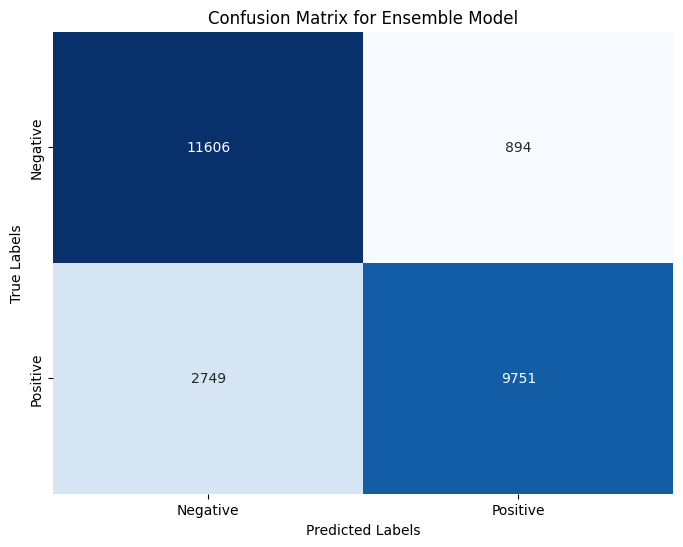

Confusion Matrix:
 [[11606   894]
 [ 2749  9751]]
True Negatives (TN): 11606
False Positives (FP): 894
False Negatives (FN): 2749
True Positives (TP): 9751

Interpretation:
The model correctly predicted 11606 negative examples (True Negatives).
It incorrectly predicted 894 negative examples as positive (False Positives).
The model incorrectly predicted 2749 positive examples as negative (False Negatives).
It correctly predicted 9751 positive examples (True Positives).


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# Function to plot and return confusion matrix
def plot_confusion_matrix(true_labels, predicted_labels, model_name):
    # Compute the confusion matrix
    cm = confusion_matrix(true_labels, predicted_labels)
    
    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=['Negative', 'Positive'], 
                yticklabels=['Negative', 'Positive'])
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

    # Return the confusion matrix for further analysis
    return cm

# Assuming you have test_labels and ensemble_predictions already defined
# Get the confusion matrix for the ensemble predictions
cm = plot_confusion_matrix(test_labels, ensemble_predictions, 'Ensemble Model')

# Print the confusion matrix
print("Confusion Matrix:\n", cm)

# Extract and print the values from the confusion matrix
tn, fp, fn, tp = cm.ravel()

print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")

# Explanation of the results
print("\nInterpretation:")
print(f"The model correctly predicted {tn} negative examples (True Negatives).")
print(f"It incorrectly predicted {fp} negative examples as positive (False Positives).")
print(f"The model incorrectly predicted {fn} positive examples as negative (False Negatives).")
print(f"It correctly predicted {tp} positive examples (True Positives).")


ROC Curve

This code evaluates and visualizes the performance of a machine learning model by plotting the ROC (Receiver Operating Characteristic) curve and calculating the AUC (Area Under the Curve). Here’s a simple breakdown:

Importing necessary libraries for calculating and plotting the ROC curve.
Defining a function to compute and plot the ROC curve, and return the values.
Calculating the ROC curve and AUC for the model’s predictions.
Plotting the ROC curve to show the trade-off between the true positive rate and false positive rate.
Printing the AUC value and the ROC curve values for further interpretation.

This curve helps you see how well your model distinguishes between classes by showing the balance between correctly and incorrectly identified positive cases, and provides a detailed breakdown of these results.

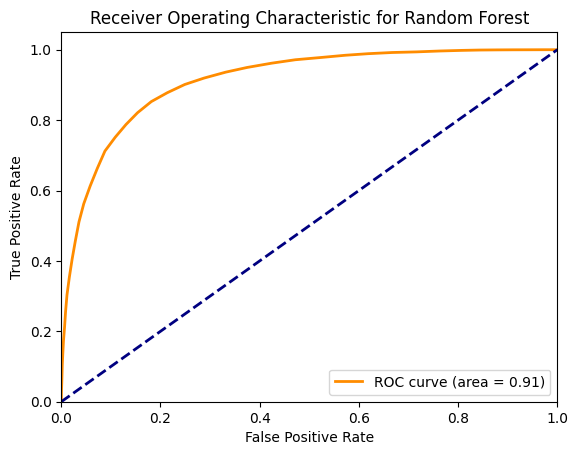

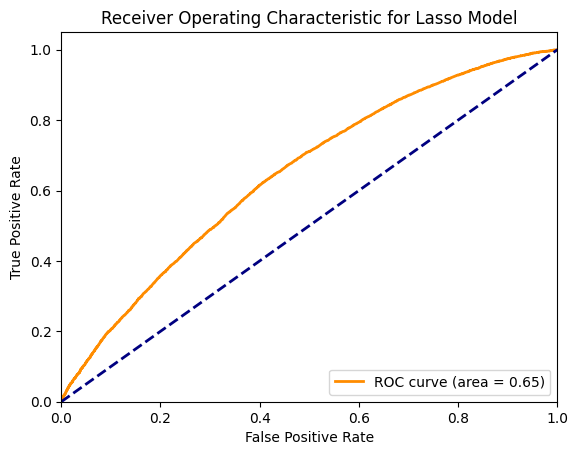

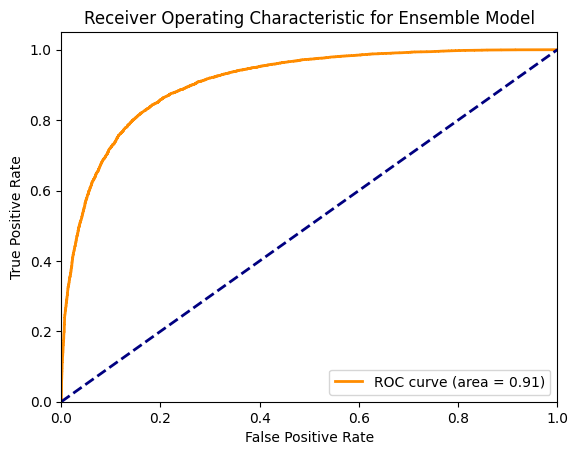

Random Forest AUC: 0.91
Lasso Model AUC: 0.65
Ensemble Model AUC: 0.91

Random Forest - False Positive Rate (FPR): [0.0000e+00 8.0000e-05 8.0000e-05 2.4000e-04 2.4000e-04 2.4000e-04
 4.8000e-04 9.6000e-04 1.4400e-03 2.0000e-03 3.0400e-03 4.4000e-03
 6.6400e-03 8.6400e-03 1.1520e-02 1.6320e-02 2.1920e-02 2.8240e-02
 3.5680e-02 4.5280e-02 5.8240e-02 7.2560e-02 8.8000e-02 1.0880e-01
 1.3040e-01 1.5384e-01 1.8152e-01 2.1360e-01 2.4888e-01 2.8784e-01
 3.3168e-01 3.7464e-01 4.2416e-01 4.7192e-01 5.2408e-01 5.7240e-01
 6.1848e-01 6.6696e-01 7.1584e-01 7.6344e-01 8.0672e-01 8.4424e-01
 8.7840e-01 9.1136e-01 9.3712e-01 9.5648e-01 9.7376e-01 9.8504e-01
 9.9328e-01 9.9760e-01 9.9936e-01 1.0000e+00]
Random Forest - True Positive Rate (TPR): [0.0000e+00 2.4000e-04 1.9200e-03 4.7200e-03 1.0720e-02 1.9360e-02
 3.3120e-02 5.1280e-02 7.3920e-02 1.0304e-01 1.3560e-01 1.7232e-01
 2.1240e-01 2.5568e-01 3.0344e-01 3.5416e-01 4.0536e-01 4.5600e-01
 5.1096e-01 5.6216e-01 6.1280e-01 6.6264e-01 7.1208e-01 7.51

In [5]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Function to calculate and plot ROC curve and return values
def plot_roc_curve(true_labels, predicted_probs, model_name):
    # Compute the ROC curve
    fpr, tpr, _ = roc_curve(true_labels, predicted_probs)
    
    # Calculate the AUC (Area Under the Curve)
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic for {model_name}')
    plt.legend(loc='lower right')
    plt.show()

    # Return FPR, TPR, and AUC for further explanation
    return fpr, tpr, roc_auc

# Assuming you have trained models and have predictions
# Bag-of-Words + Random Forest
# Vectorize the text data
tfidf = CountVectorizer(max_features=5000)
train_features = tfidf.fit_transform(train_text)
test_features = tfidf.transform(test_text)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)
rf_model.fit(train_features, train_labels)

# Get prediction probabilities
rf_probabilities = rf_model.predict_proba(test_features)[:, 1]

# Train Lasso model
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(train_features, train_labels)

# Get prediction probabilities
lasso_probabilities = lasso_model.predict(test_features)

# Majority Voting Ensemble
ensemble_probabilities = (rf_probabilities + lasso_probabilities) / 2  # Average probabilities for simplicity

# Plot ROC for individual models and ensemble
fpr_rf, tpr_rf, roc_auc_rf = plot_roc_curve(test_labels, rf_probabilities, 'Random Forest')
fpr_lasso, tpr_lasso, roc_auc_lasso = plot_roc_curve(test_labels, lasso_probabilities, 'Lasso Model')
fpr_ensemble, tpr_ensemble, roc_auc_ensemble = plot_roc_curve(test_labels, ensemble_probabilities, 'Ensemble Model')

# Print AUC values
print(f"Random Forest AUC: {roc_auc_rf:.2f}")
print(f"Lasso Model AUC: {roc_auc_lasso:.2f}")
print(f"Ensemble Model AUC: {roc_auc_ensemble:.2f}")

# Print FPR and TPR
print("\nRandom Forest - False Positive Rate (FPR):", fpr_rf)
print("Random Forest - True Positive Rate (TPR):", tpr_rf)
print("\nLasso Model - False Positive Rate (FPR):", fpr_lasso)
print("Lasso Model - True Positive Rate (TPR):", tpr_lasso)
print("\nEnsemble Model - False Positive Rate (FPR):", fpr_ensemble)
print("Ensemble Model - True Positive Rate (TPR):", tpr_ensemble)

# Interpretation
print("\nInterpretation:")
print("The ROC curve shows the trade-off between the True Positive Rate (Sensitivity) and False Positive Rate (1 - Specificity).")
print(f"The Area Under the Curve (AUC) indicates the model's ability to distinguish between positive and negative classes.")
print(f"Random Forest AUC: {roc_auc_rf:.2f}")
print(f"Lasso Model AUC: {roc_auc_lasso:.2f}")
print(f"Ensemble Model AUC: {roc_auc_ensemble:.2f}")

if roc_auc_ensemble == 1:
    print("An AUC of 1.0 means the model perfectly classifies all positive and negative instances.")
elif 0.5 < roc_auc_ensemble < 1:
    print(f"An AUC of {roc_auc_ensemble:.2f} indicates that the model has a good ability to differentiate between classes.")
elif roc_auc_ensemble == 0.5:
    print("An AUC of 0.5 indicates that the model has no discriminatory power (similar to random guessing).")
else:
    print("An AUC below 0.5 indicates that the model performs worse than random guessing.")


Precision-Recall Curve

This code evaluates and visualizes the performance of a machine learning model by plotting the Precision-Recall curve and calculating the Average Precision Score. Here’s a simple breakdown:

Importing necessary libraries for calculating and plotting the Precision-Recall curve.
Defining a function to compute and plot the Precision-Recall curve, and return the values.
Calculating the Precision-Recall curve and Average Precision Score for the model’s predictions.
Plotting the Precision-Recall curve to show the relationship between precision (accuracy of positive predictions) and recall (ability to find all positive instances).
Printing the Average Precision Score and the Precision-Recall values for further interpretation.

This curve helps you understand how well your model identifies positive cases and how accurate those identifications are, providing a detailed breakdown of these results.

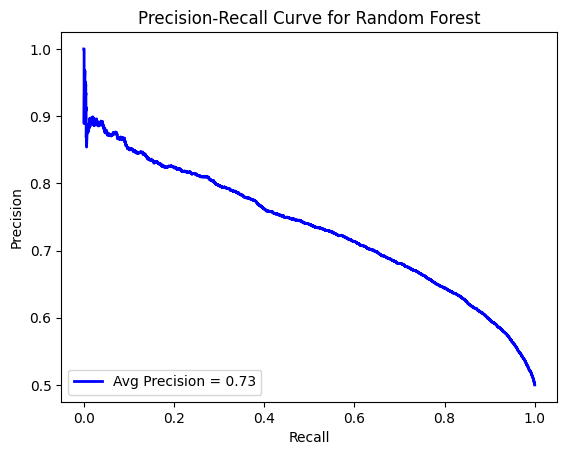

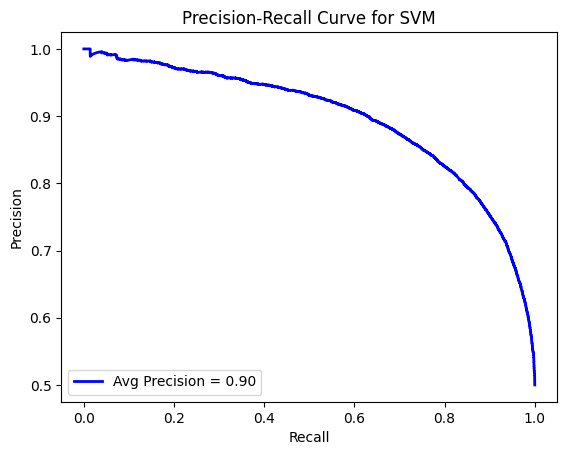

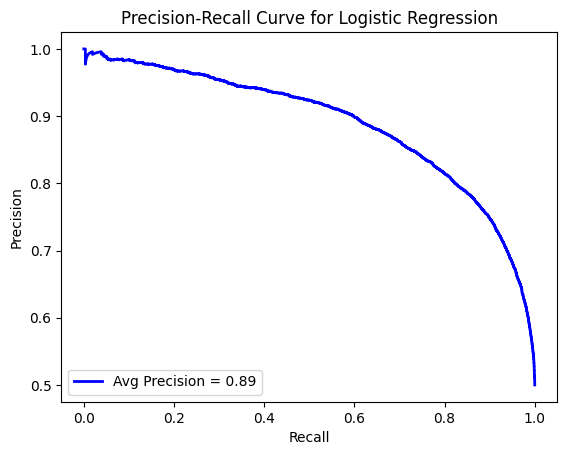

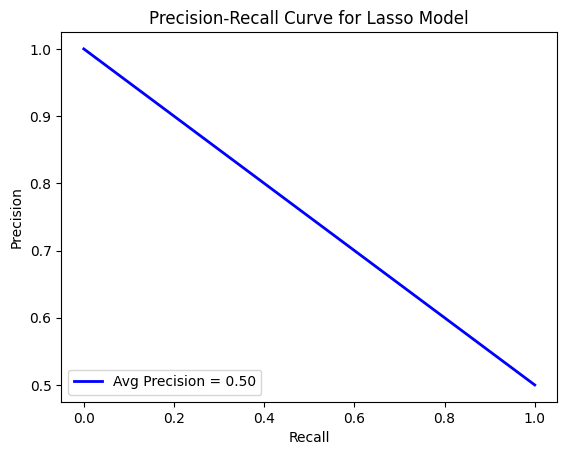

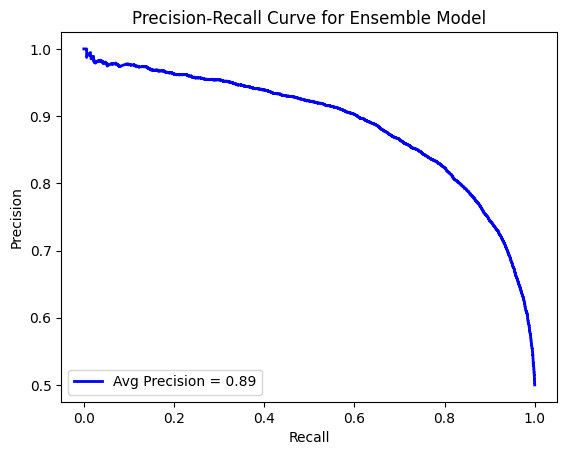

Random Forest Average Precision Score: 0.73
SVM Average Precision Score: 0.90
Logistic Regression Average Precision Score: 0.89
Lasso Model Average Precision Score: 0.50
Ensemble Model Average Precision Score: 0.89

Random Forest - Precision values: [0.5     0.50002 0.50004 ... 1.      1.      1.     ]
Random Forest - Recall values: [1.0e+00 1.0e+00 1.0e+00 ... 1.6e-04 8.0e-05 0.0e+00]

SVM - Precision values: [0.5     0.50002 0.50004 ... 1.      1.      1.     ]
SVM - Recall values: [1.0e+00 1.0e+00 1.0e+00 ... 1.6e-04 8.0e-05 0.0e+00]

Logistic Regression - Precision values: [0.5     0.50002 0.50004 ... 1.      1.      1.     ]
Logistic Regression - Recall values: [1.0e+00 1.0e+00 1.0e+00 ... 1.6e-04 8.0e-05 0.0e+00]

Lasso Model - Precision values: [0.5 1. ]
Lasso Model - Recall values: [1. 0.]

Ensemble Model - Precision values: [0.5     0.50002 0.50004 ... 1.      1.      1.     ]
Ensemble Model - Recall values: [1.0e+00 1.0e+00 1.0e+00 ... 1.6e-04 8.0e-05 0.0e+00]

Interpretation

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Load the IMDB dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# Build an index to word dictionary
word_index = imdb.get_word_index()
reverse_word_index = {value: key for (key, value) in word_index.items()}

# Decode the reviews
def decode_review(encoded_review):
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in encoded_review])

# Decode the datasets
train_text = [decode_review(review) for review in train_data]
test_text = [decode_review(review) for review in test_data]

# Convert labels to binary if not already
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

# Initialize vectorizers and scaler
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Reduce number of features
bow_vectorizer = CountVectorizer(max_features=2500)  # Reduce number of features
scaler = MaxAbsScaler()

# Transform text data into feature matrices
train_tfidf = tfidf_vectorizer.fit_transform(train_text)
test_tfidf = tfidf_vectorizer.transform(test_text)
train_bow = bow_vectorizer.fit_transform(train_text)
test_bow = bow_vectorizer.transform(test_text)
train_bow_scaled = scaler.fit_transform(train_bow)
test_bow_scaled = scaler.transform(test_bow)

# Train models with smaller sample
sample_size = 1000  # Using a subset for quick debugging
train_text_sample, _, train_labels_sample, _ = train_test_split(train_text, train_labels, train_size=sample_size, random_state=42)
train_tfidf_sample = tfidf_vectorizer.transform(train_text_sample)

# Train models
random_forest_model = RandomForestClassifier(random_state=42, n_estimators=10, max_depth=10)  # Reduced complexity
random_forest_model.fit(train_tfidf_sample, train_labels_sample)

svm_model = SVC(probability=True, random_state=42)  # SVM needs probability=True to use predict_proba
svm_model.fit(train_tfidf_sample, train_labels_sample)

logistic_regression_model = LogisticRegression(random_state=42, max_iter=500)  # Reduced iterations
logistic_regression_model.fit(train_tfidf_sample, train_labels_sample)

lasso_model = Lasso(alpha=0.1, random_state=42)
lasso_model.fit(train_bow_scaled[:sample_size], train_labels_sample)

# Function to calculate and plot Precision-Recall curve and return values
def plot_precision_recall_curve(true_labels, predicted_probs, model_name):
    precision, recall, _ = precision_recall_curve(true_labels, predicted_probs)
    avg_precision = average_precision_score(true_labels, predicted_probs)
    
    plt.figure()
    plt.plot(recall, precision, color='b', lw=2, label=f'Avg Precision = {avg_precision:.2f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve for {model_name}')
    plt.legend(loc='lower left')
    plt.show()
    
    return precision, recall, avg_precision

# Get probability scores for each model
rf_probs = random_forest_model.predict_proba(test_tfidf)[:, 1]
svm_probs = svm_model.predict_proba(test_tfidf)[:, 1]
logistic_probs = logistic_regression_model.predict_proba(test_tfidf)[:, 1]
lasso_probs = lasso_model.predict(test_bow_scaled)  # Lasso is not a probabilistic classifier, use raw predictions
lasso_probs = np.clip(lasso_probs, 0, 1)  # Ensure probabilities are in [0, 1]
ensemble_probs = (rf_probs + svm_probs + logistic_probs) / 3

# Plot Precision-Recall curves
precision_rf, recall_rf, avg_precision_rf = plot_precision_recall_curve(test_labels, rf_probs, 'Random Forest')
precision_svm, recall_svm, avg_precision_svm = plot_precision_recall_curve(test_labels, svm_probs, 'SVM')
precision_logistic, recall_logistic, avg_precision_logistic = plot_precision_recall_curve(test_labels, logistic_probs, 'Logistic Regression')
precision_lasso, recall_lasso, avg_precision_lasso = plot_precision_recall_curve(test_labels, lasso_probs, 'Lasso Model')
precision_ensemble, recall_ensemble, avg_precision_ensemble = plot_precision_recall_curve(test_labels, ensemble_probs, 'Ensemble Model')

# Print Average Precision Scores
print(f"Random Forest Average Precision Score: {avg_precision_rf:.2f}")
print(f"SVM Average Precision Score: {avg_precision_svm:.2f}")
print(f"Logistic Regression Average Precision Score: {avg_precision_logistic:.2f}")
print(f"Lasso Model Average Precision Score: {avg_precision_lasso:.2f}")
print(f"Ensemble Model Average Precision Score: {avg_precision_ensemble:.2f}")

# Print precision and recall values for each model (optional)
print("\nRandom Forest - Precision values:", precision_rf)
print("Random Forest - Recall values:", recall_rf)
print("\nSVM - Precision values:", precision_svm)
print("SVM - Recall values:", recall_svm)
print("\nLogistic Regression - Precision values:", precision_logistic)
print("Logistic Regression - Recall values:", recall_logistic)
print("\nLasso Model - Precision values:", precision_lasso)
print("Lasso Model - Recall values:", recall_lasso)
print("\nEnsemble Model - Precision values:", precision_ensemble)
print("Ensemble Model - Recall values:", recall_ensemble)

# Explanation of the Precision-Recall curve results
print("\nInterpretation:")
print("The Precision-Recall curve helps visualize the trade-off between precision and recall at various threshold settings.")
print(f"The Average Precision Score summarizes the model’s precision across all recall levels.")
print("\nKey points to understand:")
print("- **Precision**: The proportion of positive predictions that were actually correct (True Positives / Predicted Positives).")
print("- **Recall**: The proportion of actual positives that were correctly predicted by the model (True Positives / Actual Positives).")


In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import MaxAbsScaler
from tensorflow.keras.datasets import imdb

# Function to plot and return confusion matrix
def plot_confusion_matrix(true_labels, predicted_labels, model_name):
    # Compute the confusion matrix
    cm = confusion_matrix(true_labels, predicted_labels)
    
    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=['Negative', 'Positive'], 
                yticklabels=['Negative', 'Positive'])
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

    # Return the confusion matrix for further analysis
    return cm

# Load the dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# Decode the reviews back into text
word_index = imdb.get_word_index()
reverse_word_index = {value: key for key, value in word_index.items()}
train_text = [' '.join([reverse_word_index.get(i, '?') for i in review]) for review in train_data]
test_text = [' '.join([reverse_word_index.get(i, '?') for i in review]) for review in test_data]

# Text vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=10000)
train_tfidf = tfidf_vectorizer.fit_transform(train_text)
test_tfidf = tfidf_vectorizer.transform(test_text)

bow_vectorizer = CountVectorizer(max_features=5000)
train_bow = bow_vectorizer.fit_transform(train_text)
test_bow = bow_vectorizer.transform(test_text)

# Scale the Bag-of-Words features for Lasso model
scaler = MaxAbsScaler()
train_bow_scaled = scaler.fit_transform(train_bow)
test_bow_scaled = scaler.transform(test_bow)

# Define and train models
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(train_tfidf, train_labels)

svm_model = SVC(random_state=42)
svm_model.fit(train_tfidf, train_labels)

logistic_regression_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_regression_model.fit(train_tfidf, train_labels)

lasso_model = Lasso(alpha=0.1, random_state=42)
lasso_model.fit(train_bow_scaled, train_labels)

# Get predictions from all models
random_forest_predictions = random_forest_model.predict(test_tfidf)
svm_predictions = svm_model.predict(test_tfidf)
logistic_regression_predictions = logistic_regression_model.predict(test_tfidf)
lasso_predictions = np.round(lasso_model.predict(test_bow_scaled)).astype(int)

# Ensemble predictions using majority voting
ensemble_predictions = np.array([
    np.bincount([rf, svm, lr, lasso]).argmax()
    for rf, svm, lr, lasso in zip(random_forest_predictions, svm_predictions, logistic_regression_predictions, lasso_predictions)
])

# Get the confusion matrix for each model and the ensemble model
cm_rf = plot_confusion_matrix(test_labels, random_forest_predictions, 'Random Forest Model')
cm_svm = plot_confusion_matrix(test_labels, svm_predictions, 'SVM Model')
cm_lr = plot_confusion_matrix(test_labels, logistic_regression_predictions, 'Logistic Regression Model')
cm_lasso = plot_confusion_matrix(test_labels, lasso_predictions, 'Lasso Model')
cm_ensemble = plot_confusion_matrix(test_labels, ensemble_predictions, 'Ensemble Model')

# Print the confusion matrices
print("Confusion Matrix for Random Forest Model:\n", cm_rf)
print("Confusion Matrix for SVM Model:\n", cm_svm)
print("Confusion Matrix for Logistic Regression Model:\n", cm_lr)
print("Confusion Matrix for Lasso Model:\n", cm_lasso)
print("Confusion Matrix for Ensemble Model:\n", cm_ensemble)
